In this script I'll work on the EDA for the two datasets
Firt one: Insurance Charges for the ANN regressor.

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading and checking the dataset
insurance_data = pd.read_csv("in\insurance.csv")
insurance_data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
# Data info
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Object to category
insurance_data.astype({
        "sex": "category",
        "smoker": "category",
        "region": "category"})

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [6]:
# Lets see the correlation among them
insurance_cor = insurance_data.corr()
print(insurance_cor)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


C:\Users\elvie\AppData\Local\Temp\ipykernel_6820\4064483488.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  insurance_cor = insurance_data.corr()


In [7]:
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<AxesSubplot: >

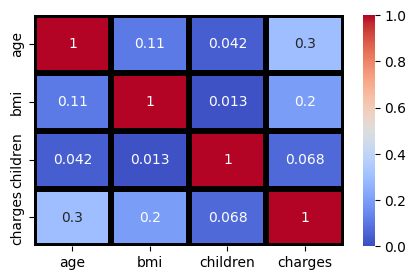

In [13]:
# Heatmap to see the correlation better
fig = plt.subplots(figsize=(5,3))
sns.heatmap(insurance_cor, annot=True, cmap="coolwarm", linewidths=3, 
            linecolor="black", vmin=0, vmax=1, cbar=True)

In this case there's no a strong correlation between the variable. So, It's neccesary to take this into account when I am training the neural network.

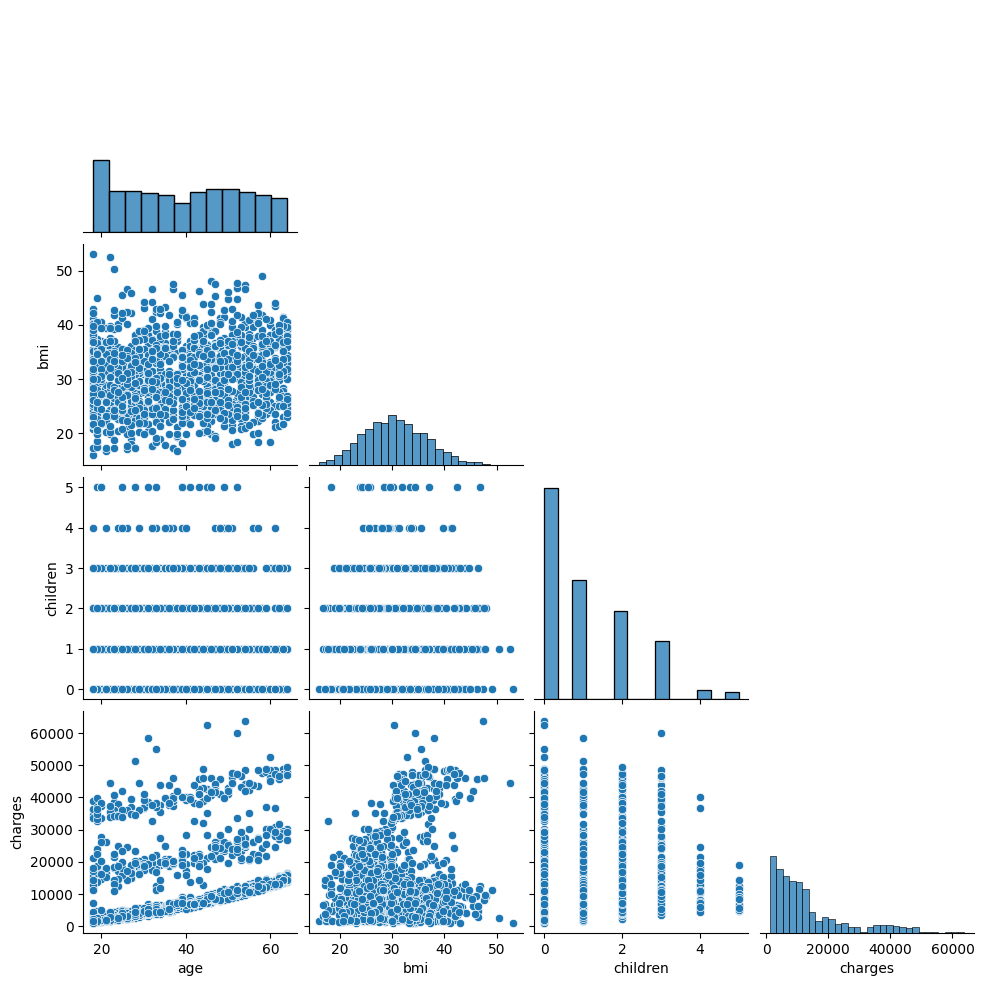

In [19]:
# Let's continue with the correlation analisys using pairplot
sns.pairplot(data=insurance_data, corner=True)

It seem there's a linear weak linear correlation between age and charges and age and BMI.

In [20]:
# Outliers in the data
def detect_outliers(Datos,x): # function to detect outliers
    Q3 = Datos[x].quantile(0.75)
    Q1 = Datos[x].quantile(0.25)
    IQR = Q3 - Q1
    superior = Q3 + (1.5 * IQR)
    inferior = Q1 - (1.5 * IQR)
    out_sup = Datos[Datos[x] > superior].index
    out_inf = Datos[Datos[x] < inferior].index
    outliers = []
    for i in out_sup:
        outliers.append(i)
        for j in out_inf:
            outliers.append(j)
    
    size = len(outliers)
    size2 = len(Datos[x])
    percentage = round((size/size2)*100,3)

    return f'There are {size} outliers in variable {x} ({percentage}%), and correspond to the indixes: {outliers}'

In [21]:
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [22]:
# Find outliers 
outlier_age = detect_outliers(insurance_data,"age")
print(outlier_age)

There are 0 outliers in variable age (0.0%), and correspond to the indixes: []


In [23]:
outlier_bmi = detect_outliers(insurance_data,"bmi")
print(outlier_bmi)

There are 9 outliers in variable bmi (0.673%), and correspond to the indixes: [116, 286, 401, 543, 847, 860, 1047, 1088, 1317]


In [24]:
outlier_charges = detect_outliers(insurance_data,"charges")
print(outlier_charges)

There are 139 outliers in variable charges (10.389%), and correspond to the indixes: [14, 19, 23, 29, 30, 34, 38, 39, 49, 53, 55, 82, 84, 86, 94, 109, 123, 146, 158, 161, 175, 185, 203, 223, 240, 242, 251, 252, 254, 256, 263, 265, 271, 281, 288, 292, 298, 312, 314, 322, 327, 328, 330, 338, 373, 377, 381, 420, 421, 422, 441, 476, 488, 500, 524, 530, 543, 549, 558, 569, 577, 587, 609, 615, 621, 623, 629, 665, 667, 668, 674, 677, 682, 689, 697, 706, 725, 736, 738, 739, 742, 759, 803, 819, 826, 828, 842, 845, 850, 852, 856, 860, 883, 893, 901, 917, 947, 951, 953, 956, 958, 1012, 1021, 1022, 1031, 1036, 1037, 1047, 1049, 1062, 1070, 1078, 1090, 1096, 1111, 1117, 1118, 1122, 1124, 1139, 1146, 1152, 1156, 1186, 1206, 1207, 1218, 1230, 1240, 1241, 1249, 1284, 1288, 1291, 1300, 1301, 1303, 1313, 1323]


There are some outliers in charges columns, but in this cases this is the target columns.
And In general the data set is alreary preproccesed, so we can continue with the modeling part.

Seconde one: Fetal Health for the ANN classifier

In [26]:
# Reading and checking the dataset
fetal_data = pd.read_csv("in/fetal_health.csv")
fetal_data.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [27]:
# Data info
fetal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [31]:
# Lets see the correlation among them
fetal_cor = fetal_data.iloc[:,1:].corr()
print(fetal_cor)

                                                    accelerations  \
accelerations                                            1.000000   
fetal_movement                                           0.048235   
uterine_contractions                                     0.089674   
light_decelerations                                     -0.108615   
severe_decelerations                                    -0.043018   
prolongued_decelerations                                -0.127749   
abnormal_short_term_variability                         -0.279577   
mean_value_of_short_term_variability                     0.207170   
percentage_of_time_with_abnormal_long_term_vari...      -0.373943   
mean_value_of_long_term_variability                     -0.142363   
histogram_width                                          0.298631   
histogram_min                                           -0.154286   
histogram_max                                            0.394147   
histogram_number_of_peaks         

<AxesSubplot: >

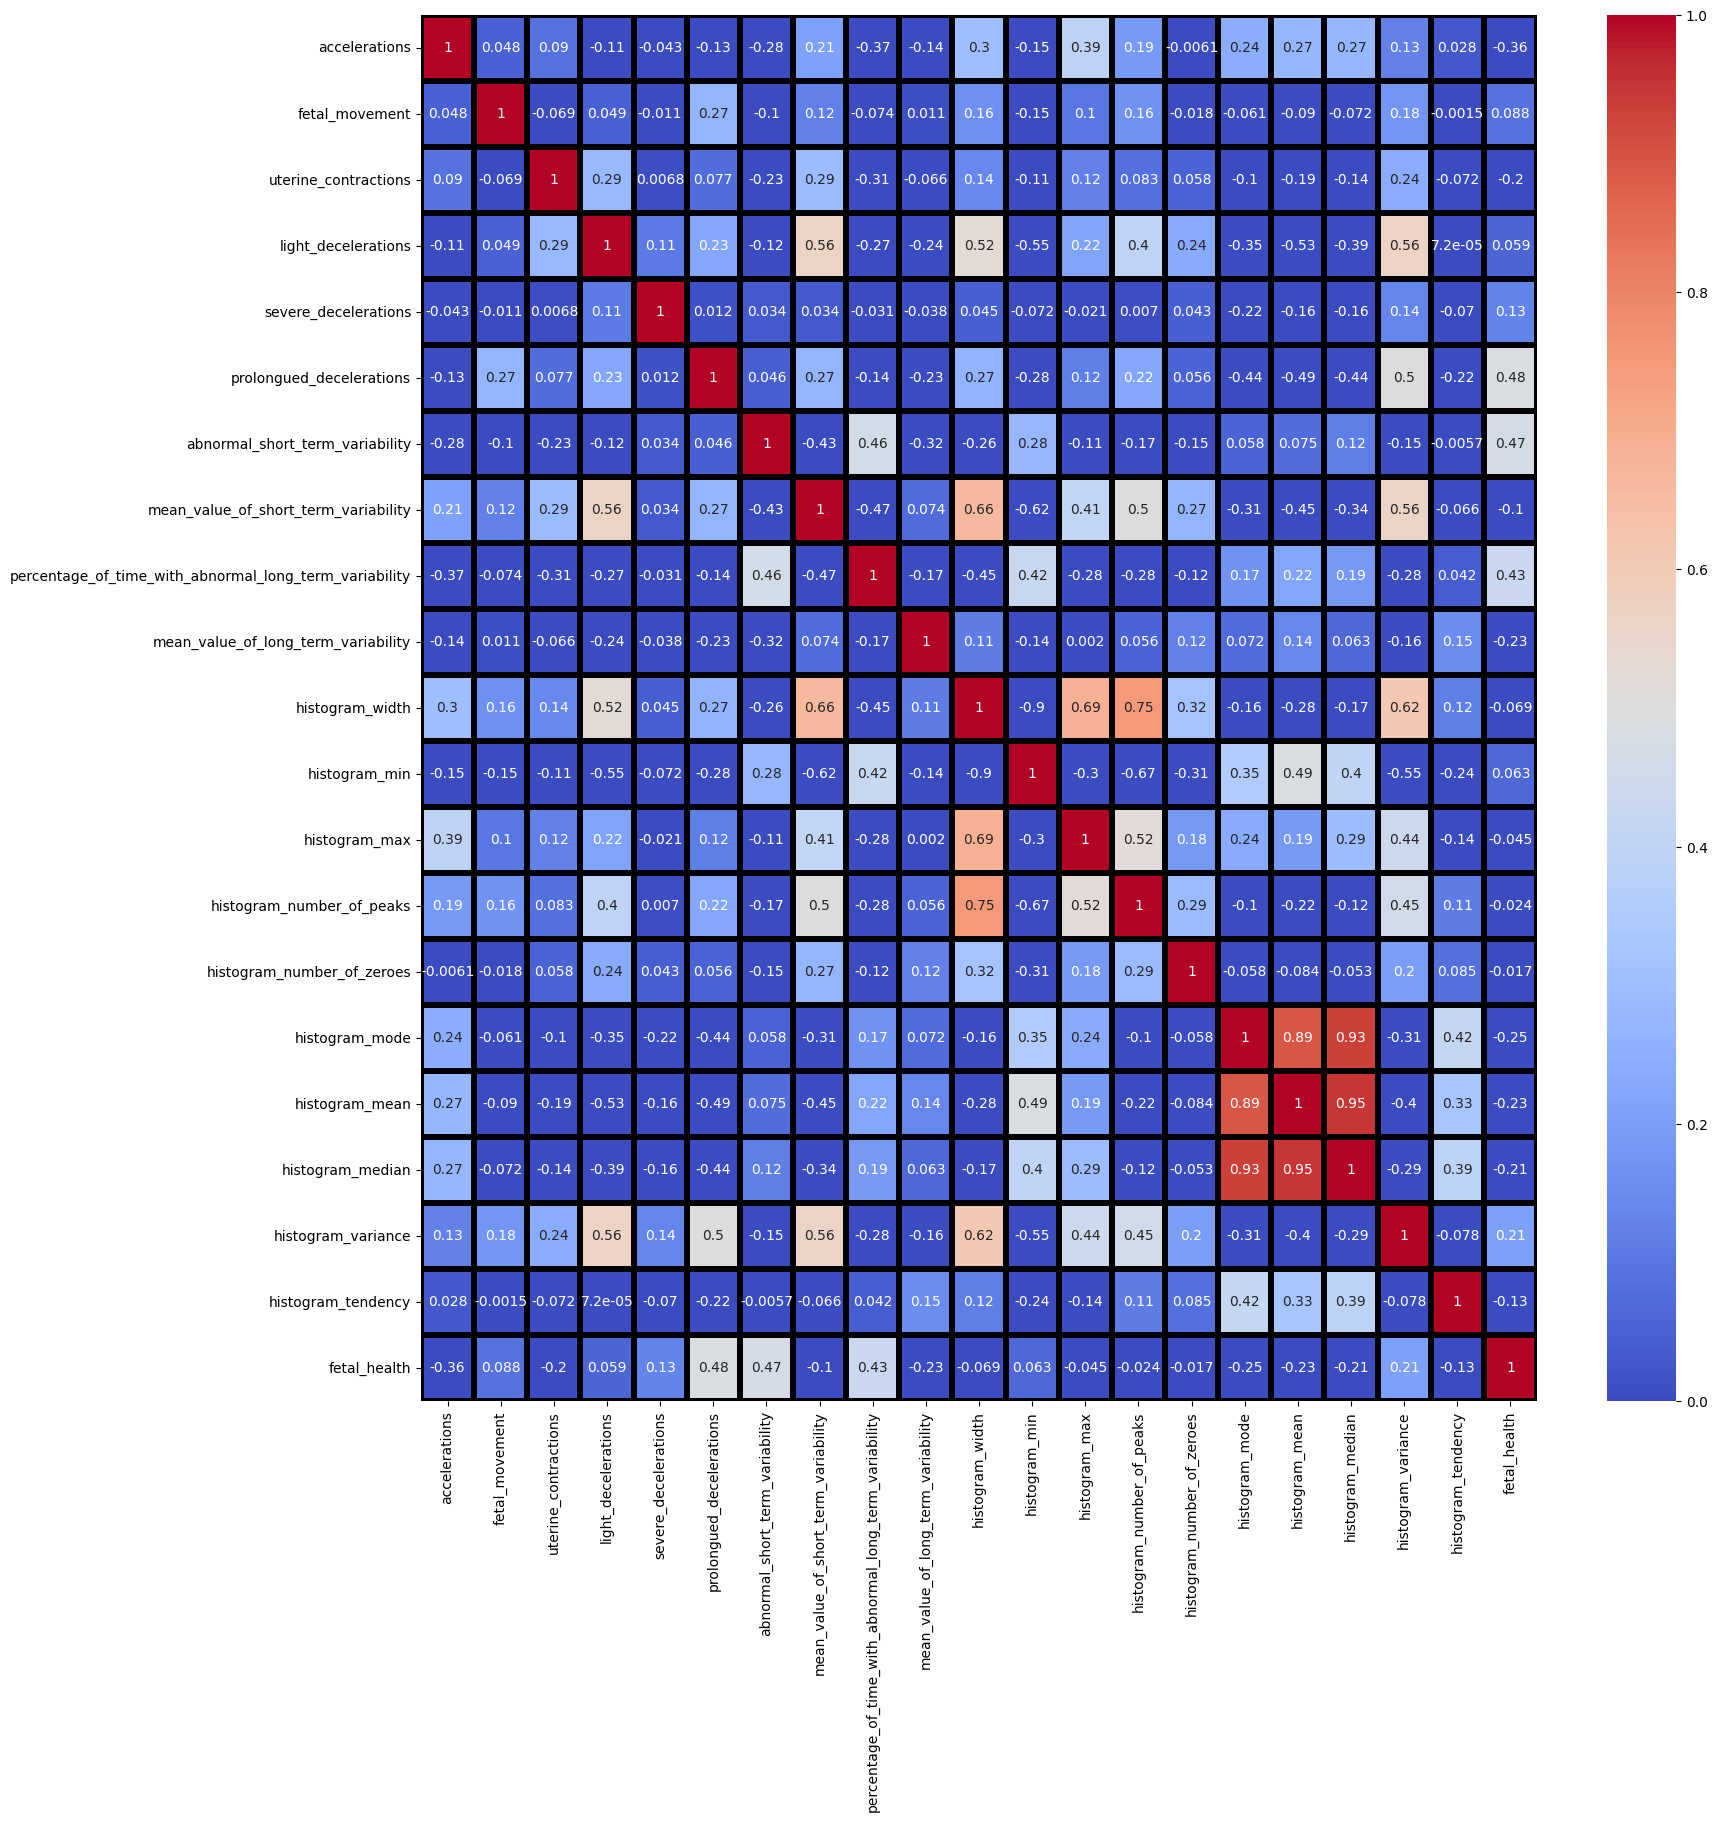

In [34]:
# Heatmap to see the correlation better
fig = plt.subplots(figsize=(18,18))
sns.heatmap(fetal_cor, annot=True, cmap="coolwarm", linewidths=3, 
            linecolor="black", vmin=0, vmax=1, cbar=True)

In this case there's a strong correlation between some variables (see the heatmap and pairplot charts) and at the same time there's a lot of them. So, in this case is necessary to apply PCA to get just the most correlated ones.

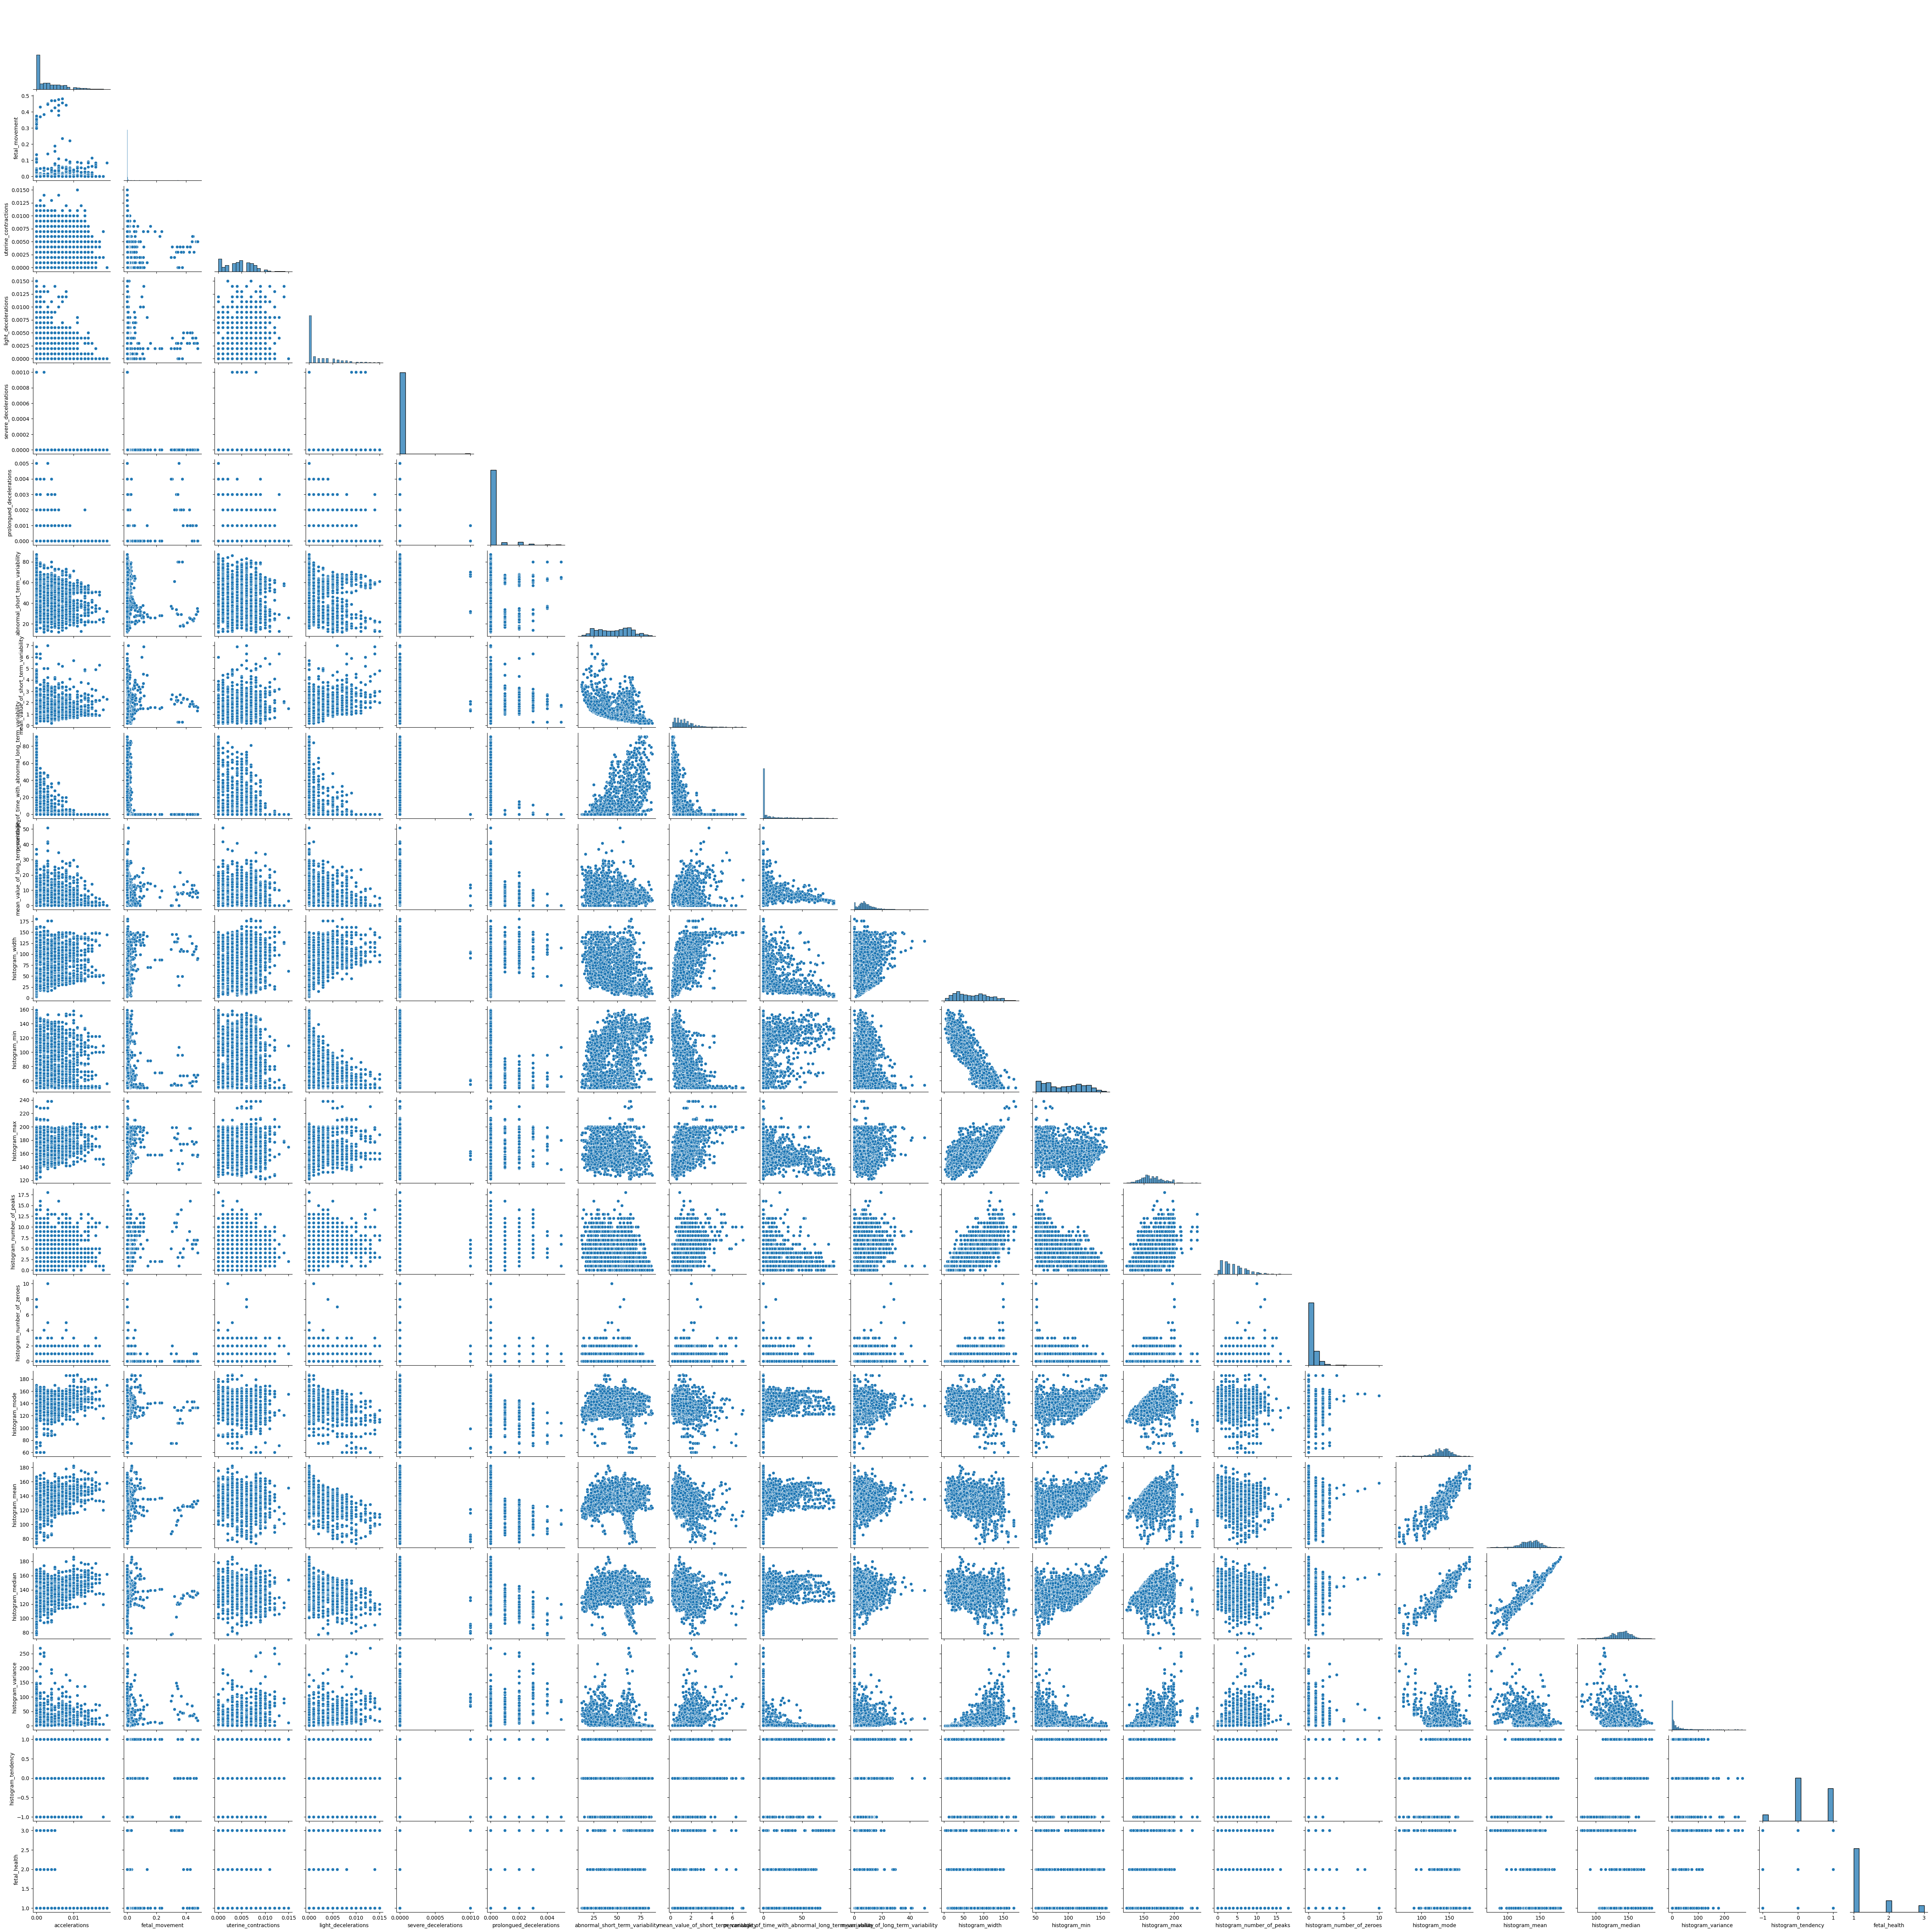

In [35]:
# Let's make a pairplot chart
sns.pairplot(data=fetal_data.iloc[:,1:], corner=True)

In this case I won't evaluate the outliers, because I'll apply feature engineering for helping me to decide the final features.